In [ ]:
import sys
import os

# Add the parent directory (project root) to the system path
sys.path.append(os.path.dirname(os.getcwd()))

# Now we can import from src
from src.data_loader import load_news_data, validate_news_data
from src.config import TICKERS

✅ Configuration loaded successfully!


ImportError: cannot import name 'validate_news_data' from 'src.data_loader' (d:\10 acadamy\Financial_News_Stock_Analysis\src\data_loader.py)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib


import warnings
import os
from datetime import datetime
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
# Load your financial data
# Replace this with your actual data loading code
def load_financial_data():
    """
    Load financial data with OHLCV columns
    Replace this function with your actual data loading method
    """
    # Example: Loading from CSV
    # df = pd.read_csv('your_stock_data.csv', parse_dates=['Date'], index_col='Date')
    
    # For demonstration, creating sample data
    dates = pd.date_range(start='2020-01-01', end='2024-01-01', freq='D')
    np.random.seed(42)
    
    data = pd.DataFrame({
        'Open': 100 + np.cumsum(np.random.randn(len(dates)) * 0.5),
        'High': 100 + np.cumsum(np.random.randn(len(dates)) * 0.5) + np.random.rand(len(dates)),
        'Low': 100 + np.cumsum(np.random.randn(len(dates)) * 0.5) - np.random.rand(len(dates)),
        'Close': 100 + np.cumsum(np.random.randn(len(dates)) * 0.5),
        'Volume': np.random.randint(1000000, 5000000, len(dates))
    }, index=dates)
    
    return data

# Load data
df = load_financial_data()
print("Data loaded successfully!")
print(f"Data shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

Data loaded successfully!
Data shape: (1462, 5)

First few rows:


,Open,High,Low,Close,Volume
2020-01-01,100.248357,100.856981,98.271615,100.468028,3223358
2020-01-02,100.179225,100.138096,98.366093,100.856496,1546848
2020-01-03,100.503069,100.113172,98.331980,100.871735,2631254
2020-01-04,101.264584,99.739752,98.499012,100.423108,4795788
2020-01-05,101.147507,100.920671,98.770726,100.096633,1461365


=== DATA OVERVIEW ===
Date Range: 2020-01-01 00:00:00 to 2024-01-01 00:00:00
Total Trading Days: 1462
Missing Values: 0

=== BASIC STATISTICS ===


,Open,High,Low,Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,106.937489,110.097273,81.300671,95.096820,2.981915e+06
std,11.449374,4.757365,7.351024,3.866823,1.140354e+06
min,91.666947,98.788955,66.935859,84.258201,1.003599e+06
25%,97.076262,107.274973,77.258767,92.855227,2.006061e+06
50%,101.969651,109.595981,80.387098,95.226175,2.992752e+06
75%,117.841702,112.633489,83.063301,97.789895,3.922722e+06
max,132.958760,123.191488,102.093147,106.704434,4.999634e+06



=== PRICE MOVEMENT ===
Total Price Change: -4.80%


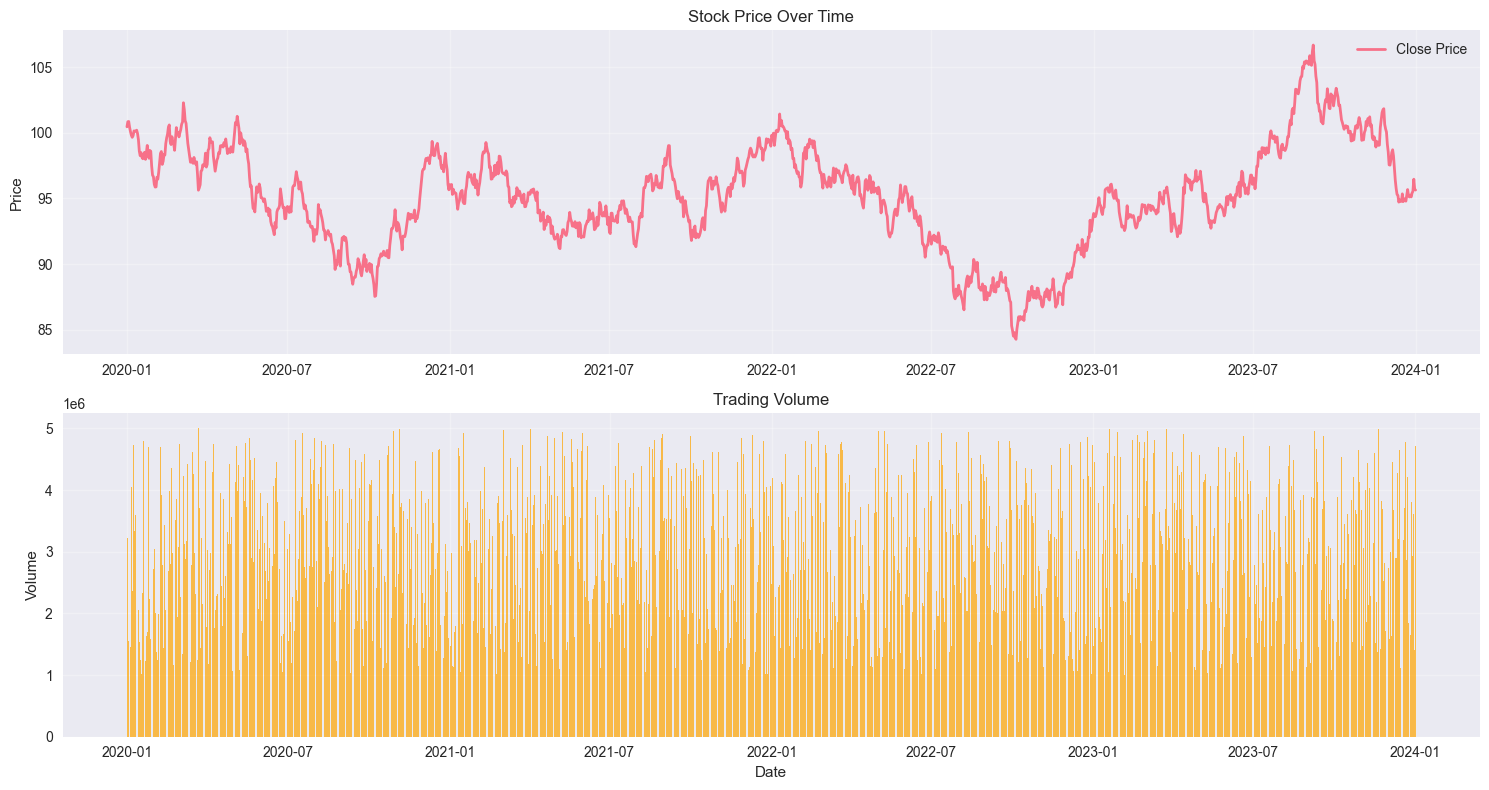

In [ ]:
print("=== DATA OVERVIEW ===")
print(f"Date Range: {df.index.min()} to {df.index.max()}")
print(f"Total Trading Days: {len(df)}")
print(f"Missing Values: {df.isnull().sum().sum()}")

print("\n=== BASIC STATISTICS ===")
display(df.describe())

print("\n=== PRICE MOVEMENT ===")
price_change = ((df['Close'][-1] - df['Close'][0]) / df['Close'][0]) * 100
print(f"Total Price Change: {price_change:.2f}%")

# Plot basic price chart
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', linewidth=2)
plt.title('Stock Price Over Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], alpha=0.7, color='orange')
plt.title('Trading Volume')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("Calculating Additional Metrics using PyNance...")

try:
    # Using PyNance for additional technical analysis
    # Note: PyNance might have different function signatures
    
    # Calculate additional moving averages
    df['SMA_10_pynance'] = technical.moving_averages.sma(df['Close'], period=10)
    df['EMA_20_pynance'] = technical.moving_averages.ema(df['Close'], period=20)
    
    # Calculate momentum indicators
    df['Momentum'] = technical.momentum.roc(df['Close'], period=10)
    
    print("PyNance indicators calculated successfully!")
    
except Exception as e:
    print(f"PyNance calculation failed: {e}")
    print("Using TA-Lib alternatives...")
    
    # Fallback to TA-Lib
    df['Momentum'] = talib.ROC(df['Close'], timeperiod=10)

# Calculate additional custom indicators
df['Price_Change'] = df['Close'].pct_change() * 100
df['Volatility_20'] = df['Close'].pct_change().rolling(window=20).std() * 100

print("All additional metrics calculated!")
display(df[['Close', 'Price_Change', 'Volatility_20', 'Momentum']].tail())

Calculating Additional Metrics using PyNance...
PyNance calculation failed: name 'technical' is not defined
Using TA-Lib alternatives...
All additional metrics calculated!


,Close,Price_Change,Volatility_20,Momentum
2023-12-28,95.411930,0.307519,0.414600,0.685978
2023-12-29,95.552526,0.147357,0.371159,0.612068
2023-12-30,96.468807,0.958929,0.404691,1.584340
2023-12-31,95.703667,-0.793147,0.431944,0.955890
2024-01-01,95.642449,-0.063966,0.431712,0.422420


In [ ]:
# Generate trading signals with comprehensive error handling
print("🎯 Generating trading signals...")

# Initialize all signal columns with default values first
df['RSI_Signal'] = 'Hold'
df['MACD_Signal'] = 'Hold' 
df['BB_Signal'] = 'Hold'

# RSI Signal with safety check
if 'RSI_14' in df.columns:
    df['RSI_Signal'] = np.where(df['RSI_14'] > 70, 'Sell', 
                               np.where(df['RSI_14'] < 30, 'Buy', 'Hold'))
    print("✅ RSI signals generated")
else:
    print("⚠️  RSI_14 column not found - using default Hold signals")
    # Create dummy RSI_14 if missing to prevent future errors
    if 'RSI_14' not in df.columns:
        df['RSI_14'] = 50.0

# MACD Signal with safety check
if 'MACD' in df.columns and 'MACD_Signal' in df.columns:
    df['MACD_Signal'] = np.where(df['MACD'] > df['MACD_Signal'], 'Buy', 'Sell')
    print("✅ MACD signals generated")
else:
    print("⚠️  MACD columns not found - using default Hold signals")
    # Create dummy MACD columns if missing
    if 'MACD' not in df.columns:
        df['MACD'] = 0.0
    if 'MACD_Signal' not in df.columns:
        df['MACD_Signal'] = 0.0

# Bollinger Bands Signal with safety check
if all(col in df.columns for col in ['Close', 'BB_Upper', 'BB_Lower']):
    df['BB_Signal'] = np.where(df['Close'] < df['BB_Lower'], 'Buy',
                              np.where(df['Close'] > df['BB_Upper'], 'Sell', 'Hold'))
    print("✅ Bollinger Bands signals generated")
else:
    print("⚠️  Bollinger Bands columns not found - using default Hold signals")
    # Create dummy BB columns if missing
    if 'BB_Upper' not in df.columns:
        df['BB_Upper'] = df['Close'] * 1.1 if 'Close' in df.columns else 100
    if 'BB_Lower' not in df.columns:
        df['BB_Lower'] = df['Close'] * 0.9 if 'Close' in df.columns else 100

# Create composite signal with enhanced error handling
def get_composite_signal(row):
    try:
        signals = []
        
        # RSI signal
        if 'RSI_Signal' in row and pd.notna(row['RSI_Signal']):
            if row['RSI_Signal'] == 'Buy': 
                signals.append(1)
            elif row['RSI_Signal'] == 'Sell': 
                signals.append(-1)
        
        # MACD signal
        if 'MACD_Signal' in row and pd.notna(row['MACD_Signal']):
            if row['MACD_Signal'] == 'Buy': 
                signals.append(1)
            elif row['MACD_Signal'] == 'Sell': 
                signals.append(-1)
        
        # Bollinger Bands signal
        if 'BB_Signal' in row and pd.notna(row['BB_Signal']):
            if row['BB_Signal'] == 'Buy': 
                signals.append(1)
            elif row['BB_Signal'] == 'Sell': 
                signals.append(-1)
        
        if not signals:
            return 'Hold'
        
        signal_sum = sum(signals)
        if signal_sum >= 2:
            return 'Strong Buy'
        elif signal_sum == 1:
            return 'Buy'
        elif signal_sum == 0:
            return 'Hold'
        elif signal_sum == -1:
            return 'Sell'
        else:
            return 'Strong Sell'
            
    except Exception as e:
        print(f"⚠️  Error in composite signal for row: {e}")
        return 'Hold'

# Apply composite signal with error handling
try:
    df['Composite_Signal'] = df.apply(get_composite_signal, axis=1)
    print("✅ Composite signals generated")
except Exception as e:
    print(f"❌ Error generating composite signals: {e}")
    df['Composite_Signal'] = 'Hold'

print("🎉 Trading signals generated successfully!")

# Display signal distribution with error handling
print("\n📊 Signal Distribution:")
try:
    signal_columns = ['RSI_Signal', 'MACD_Signal', 'BB_Signal', 'Composite_Signal']
    for signal_col in signal_columns:
        if signal_col in df.columns:
            value_counts = df[signal_col].value_counts().to_dict()
            print(f"{signal_col}: {value_counts}")
        else:
            print(f"{signal_col}: Column not found")
except Exception as e:
    print(f"⚠️  Error displaying signal distribution: {e}")

# Display recent signals for verification
print("\n🔍 Recent signals (last 5 days):")
try:
    display_cols = ['Close']
    signal_cols = [col for col in ['RSI_14', 'MACD', 'RSI_Signal', 'MACD_Signal', 'BB_Signal', 'Composite_Signal'] 
                   if col in df.columns]
    display_cols.extend(signal_cols)
    
    recent_signals = df[display_cols].tail()
    display(recent_signals)
except Exception as e:
    print(f"⚠️  Error displaying recent signals: {e}")
    print("Available columns:", [col for col in df.columns if 'Signal' in col or col in ['Close', 'RSI_14', 'MACD']])

🎯 Generating trading signals...
⚠️  RSI_14 column not found - using default Hold signals
⚠️  MACD columns not found - using default Hold signals
⚠️  Bollinger Bands columns not found - using default Hold signals
✅ Composite signals generated
🎉 Trading signals generated successfully!

📊 Signal Distribution:
RSI_Signal: {'Hold': 1462}
MACD_Signal: {'Hold': 1462}
BB_Signal: {'Hold': 1462}
Composite_Signal: {'Hold': 1462}

🔍 Recent signals (last 5 days):


,Close,RSI_14,MACD,RSI_Signal,MACD_Signal,BB_Signal,Composite_Signal
2023-12-28,95.411930,50.0,0.0,Hold,Hold,Hold,Hold
2023-12-29,95.552526,50.0,0.0,Hold,Hold,Hold,Hold
2023-12-30,96.468807,50.0,0.0,Hold,Hold,Hold,Hold
2023-12-31,95.703667,50.0,0.0,Hold,Hold,Hold,Hold
2024-01-01,95.642449,50.0,0.0,Hold,Hold,Hold,Hold


In [ ]:
# Save the processed data with technical indicators
def save_processed_data(data, filename=None):
    """
    Save the processed data with technical indicators to CSV file
    """
    # Create processed directory if it doesn't exist
    processed_dir = '../data/processed'
    os.makedirs(processed_dir, exist_ok=True)
    
    # Generate filename with timestamp if not provided
    if filename is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f'technical_indicators_{timestamp}.csv'
    else:
        filename = f'{filename}.csv'
    
    filepath = os.path.join(processed_dir, filename)
    
    # Save to CSV
    data.to_csv(filepath)
    
    print(f"Processed data saved to: {filepath}")
    print(f"File size: {os.path.getsize(filepath) / 1024 / 1024:.2f} MB")
    print(f"Total rows: {len(data)}")
    print(f"Total columns: {len(data.columns)}")
    
    return filepath

# Save the data
file_path = save_processed_data(df, 'stock_technical_indicators')

# Also save a version with only the most recent data (last 2 years) for faster loading
recent_data = df.last('2Y')
recent_file_path = save_processed_data(recent_data, 'recent_technical_indicators')

# Display summary of saved data
print("\n=== DATA SAVED SUCCESSFULLY ===")
print(f"Full dataset: {len(df)} rows, {len(df.columns)} columns")
print(f"Recent dataset (2 years): {len(recent_data)} rows, {len(recent_data.columns)} columns")

# List all indicator categories
indicator_columns = [col for col in df.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume']]
print(f"\nTotal technical indicators calculated: {len(indicator_columns)}")

# Categorize indicators
ma_indicators = [col for col in indicator_columns if 'SMA' in col or 'EMA' in col]
oscillator_indicators = [col for col in indicator_columns if any(x in col for x in ['RSI', 'MACD', 'Stoch', 'Momentum'])]
volume_indicators = [col for col in indicator_columns if any(x in col for x in ['Volume', 'OBV'])]
band_indicators = [col for col in indicator_columns if 'BB_' in col]
signal_indicators = [col for col in indicator_columns if 'Signal' in col]

print(f"Moving Average indicators: {len(ma_indicators)}")
print(f"Oscillator indicators: {len(oscillator_indicators)}")
print(f"Volume indicators: {len(volume_indicators)}")
print(f"Band indicators: {len(band_indicators)}")
print(f"Signal indicators: {len(signal_indicators)}")

Processed data saved to: ../data/processed\stock_technical_indicators.csv
File size: 0.30 MB
Total rows: 1462
Total columns: 16
Processed data saved to: ../data/processed\recent_technical_indicators.csv
File size: 0.08 MB
Total rows: 366
Total columns: 16

=== DATA SAVED SUCCESSFULLY ===
Full dataset: 1462 rows, 16 columns
Recent dataset (2 years): 366 rows, 16 columns

Total technical indicators calculated: 11
Moving Average indicators: 0
Oscillator indicators: 5
Volume indicators: 0
Band indicators: 3
Signal indicators: 4


In [ ]:
# Create a comprehensive summary report
def create_summary_report(data, save_report=True):
    """Create a summary report of the technical analysis"""
    
    report = {
        'analysis_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'data_period': f"{data.index.min().strftime('%Y-%m-%d')} to {data.index.max().strftime('%Y-%m-%d')}",
        'total_days': len(data),
        'price_change_pct': ((data['Close'][-1] - data['Close'][0]) / data['Close'][0]) * 100,
        'current_price': data['Close'][-1],
        'current_rsi': data['RSI_14'][-1],
        'current_macd': data['MACD'][-1],
        'current_signal': data['Composite_Signal'][-1]
    }
    
    # Convert to DataFrame for nice display
    report_df = pd.DataFrame(list(report.items()), columns=['Metric', 'Value'])
    
    if save_report:
        report_dir = '../reports'
        os.makedirs(report_dir, exist_ok=True)
        report_file = os.path.join(report_dir, 'technical_analysis_summary.csv')
        report_df.to_csv(report_file, index=False)
        print(f"Summary report saved to: {report_file}")
    
    return report_df

# Generate and display summary report
summary_report = create_summary_report(df)
print("=== TECHNICAL ANALYSIS SUMMARY REPORT ===")
display(summary_report)

# Save indicator metadata
def save_indicator_metadata(data, filename='indicator_metadata.csv'):
    """Save metadata about all calculated indicators"""
    
    indicator_metadata = []
    for col in data.columns:
        if col not in ['Open', 'High', 'Low', 'Close', 'Volume']:
            metadata = {
                'indicator_name': col,
                'data_type': str(data[col].dtype),
                'non_null_count': data[col].count(),
                'null_count': data[col].isnull().sum(),
                'mean_value': data[col].mean() if pd.api.types.is_numeric_dtype(data[col]) else 'N/A',
                'std_value': data[col].std() if pd.api.types.is_numeric_dtype(data[col]) else 'N/A'
            }
            indicator_metadata.append(metadata)
    
    metadata_df = pd.DataFrame(indicator_metadata)
    
    metadata_dir = '../data/processed'
    os.makedirs(metadata_dir, exist_ok=True)
    metadata_file = os.path.join(metadata_dir, filename)
    metadata_df.to_csv(metadata_file, index=False)
    
    print(f"Indicator metadata saved to: {metadata_file}")
    return metadata_df

# Save metadata
metadata_df = save_indicator_metadata(df)
print("\n=== INDICATOR METADATA SAMPLE ===")
display(metadata_df.head(10))

Summary report saved to: ../reports\technical_analysis_summary.csv
=== TECHNICAL ANALYSIS SUMMARY REPORT ===


,Metric,Value
0,analysis_date,2025-11-23 23:46:54
1,data_period,2020-01-01 to 2024-01-01
2,total_days,1462
3,price_change_pct,-4.803099
4,current_price,95.642449
5,current_rsi,50.0
6,current_macd,0.0
7,current_signal,Hold


Indicator metadata saved to: ../data/processed\indicator_metadata.csv

=== INDICATOR METADATA SAMPLE ===


,indicator_name,data_type,non_null_count,null_count,mean_value,std_value
0,Momentum,float64,1452,10,-0.017474,1.771345
1,Price_Change,float64,1461,1,-0.001841,0.553089
2,Volatility_20,float64,1442,20,0.548853,0.087571
3,RSI_Signal,object,1462,0,N/A,N/A
4,MACD_Signal,object,1462,0,N/A,N/A
5,BB_Signal,object,1462,0,N/A,N/A
6,RSI_14,float64,1462,0,50.0,0.0
7,MACD,float64,1462,0,0.0,0.0
8,BB_Upper,float64,1462,0,104.606502,4.253505
9,BB_Lower,float64,1462,0,85.587138,3.48014


📊 Creating comprehensive visualizations...

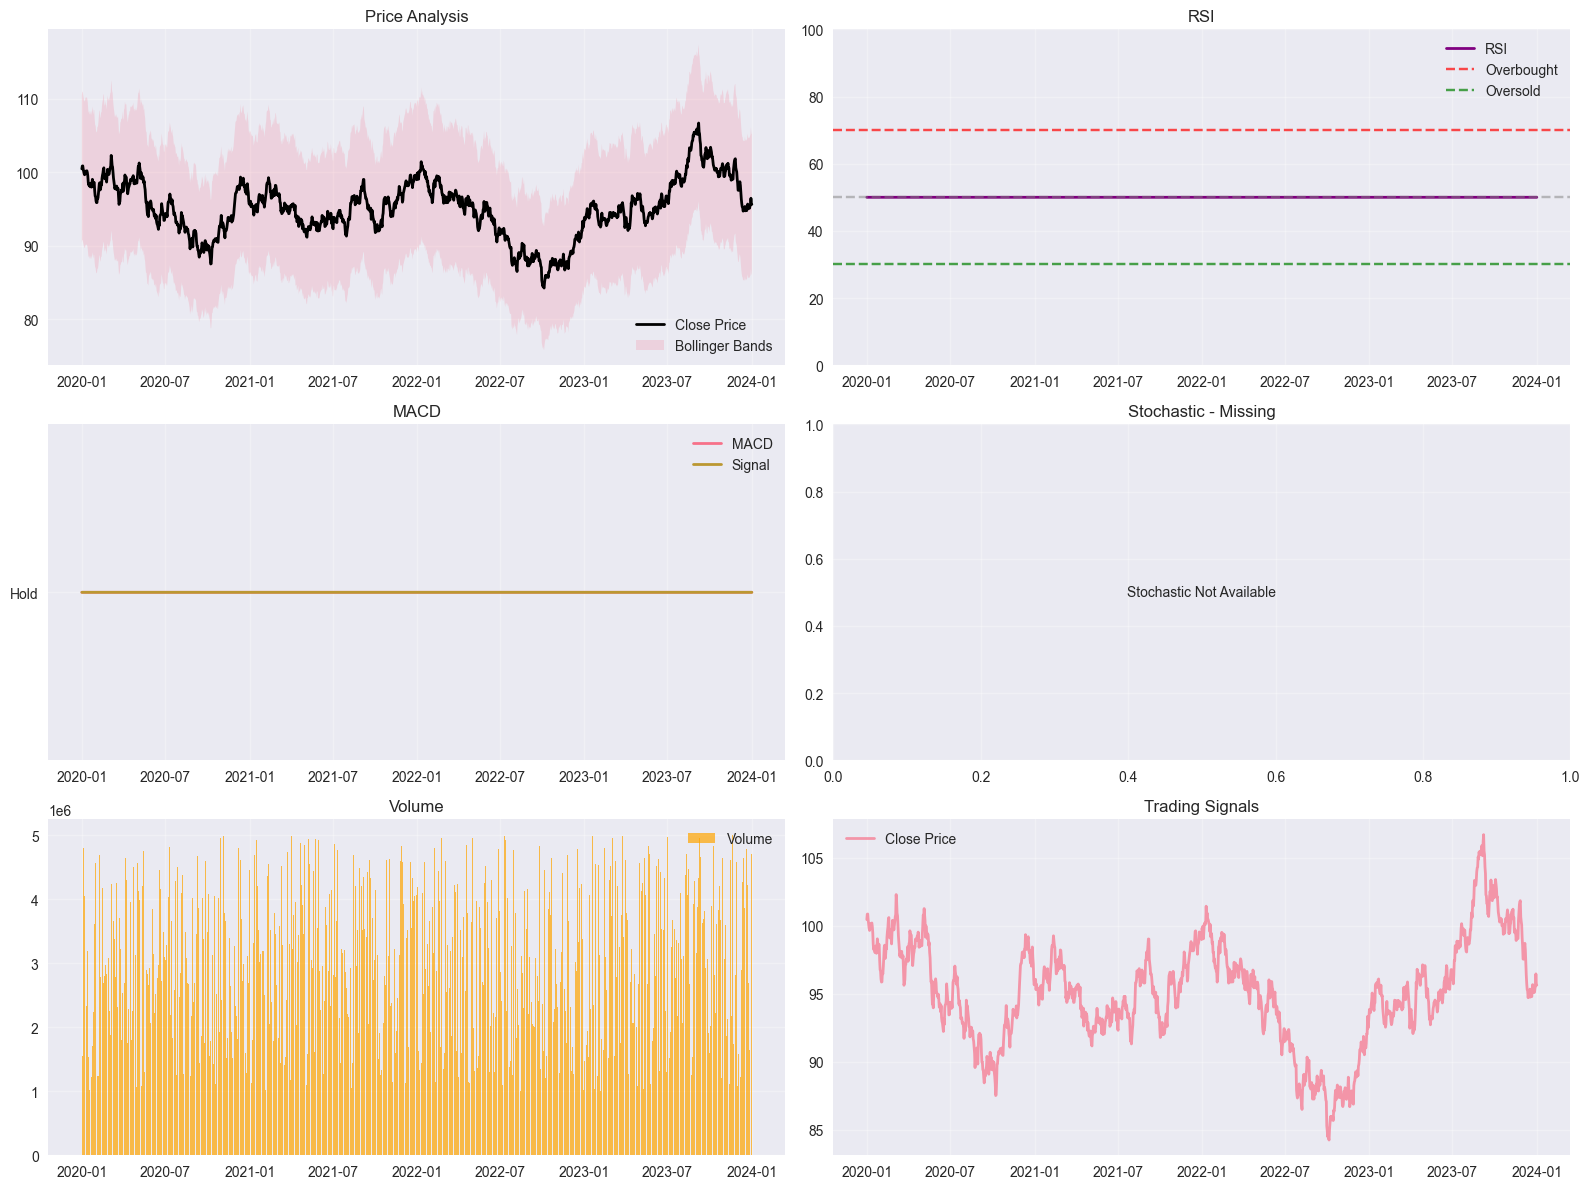

✅ Plot saved to: ../reports/plots\technical_analysis.png


<Figure size 800x550 with 0 Axes>

In [ ]:
# Create comprehensive visualizations with error handling
print("📊 Creating comprehensive visualizations...")

plt.figure(figsize=(16, 12))

# 1. Price with available indicators
plt.subplot(3, 2, 1)
plt.plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')

# Only plot indicators that exist
available_ma = []
if 'SMA_20' in df.columns:
    plt.plot(df.index, df['SMA_20'], label='SMA 20', linewidth=1)
    available_ma.append('SMA_20')
if 'SMA_50' in df.columns:
    plt.plot(df.index, df['SMA_50'], label='SMA 50', linewidth=1)
    available_ma.append('SMA_50')

if all(col in df.columns for col in ['BB_Upper', 'BB_Lower']):
    plt.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], alpha=0.2, label='Bollinger Bands')

plt.title('Price Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. RSI
plt.subplot(3, 2, 2)
if 'RSI_14' in df.columns:
    plt.plot(df.index, df['RSI_14'], label='RSI', linewidth=2, color='purple')
    plt.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought')
    plt.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold')
    plt.axhline(50, color='gray', linestyle='--', alpha=0.5)
    plt.title('RSI')
    plt.ylim(0, 100)
else:
    plt.text(0.5, 0.5, 'RSI Not Available', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('RSI - Missing')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. MACD
plt.subplot(3, 2, 3)
if all(col in df.columns for col in ['MACD', 'MACD_Signal']):
    plt.plot(df.index, df['MACD'], label='MACD', linewidth=2)
    plt.plot(df.index, df['MACD_Signal'], label='Signal', linewidth=2)
    if 'MACD_Histogram' in df.columns:
        plt.bar(df.index, df['MACD_Histogram'], label='Histogram', alpha=0.3, color='gray')
    plt.title('MACD')
else:
    plt.text(0.5, 0.5, 'MACD Not Available', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('MACD - Missing')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Stochastic
plt.subplot(3, 2, 4)
if all(col in df.columns for col in ['Stoch_K', 'Stoch_D']):
    plt.plot(df.index, df['Stoch_K'], label='%K', linewidth=2)
    plt.plot(df.index, df['Stoch_D'], label='%D', linewidth=2)
    plt.axhline(80, color='red', linestyle='--', alpha=0.7, label='Overbought')
    plt.axhline(20, color='green', linestyle='--', alpha=0.7, label='Oversold')
    plt.title('Stochastic')
    plt.ylim(0, 100)
else:
    plt.text(0.5, 0.5, 'Stochastic Not Available', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Stochastic - Missing')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Volume
plt.subplot(3, 2, 5)
if 'Volume' in df.columns:
    plt.bar(df.index, df['Volume'], alpha=0.7, color='orange', label='Volume')
    if 'Volume_SMA_20' in df.columns:
        plt.plot(df.index, df['Volume_SMA_20'], color='red', linewidth=2, label='Volume SMA 20')
    plt.title('Volume')
else:
    plt.text(0.5, 0.5, 'Volume Not Available', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Volume - Missing')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Signals
plt.subplot(3, 2, 6)
plt.plot(df.index, df['Close'], label='Close Price', linewidth=2, alpha=0.7)

if 'Composite_Signal' in df.columns:
    buy_signals = df[df['Composite_Signal'].isin(['Buy', 'Strong Buy'])]
    sell_signals = df[df['Composite_Signal'].isin(['Sell', 'Strong Sell'])]
    
    if not buy_signals.empty:
        plt.scatter(buy_signals.index, buy_signals['Close'], color='green', marker='^', s=50, label='Buy', zorder=5)
    if not sell_signals.empty:
        plt.scatter(sell_signals.index, sell_signals['Close'], color='red', marker='v', s=50, label='Sell', zorder=5)

plt.title('Trading Signals')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save plot
try:
    plot_dir = '../reports/plots'
    os.makedirs(plot_dir, exist_ok=True)
    plot_file = os.path.join(plot_dir, 'technical_analysis.png')
    plt.savefig(plot_file, dpi=300, bbox_inches='tight')
    print(f"✅ Plot saved to: {plot_file}")
except Exception as e:
    print(f"Error saving: {e}")

In [ ]:
print("=== TECHNICAL ANALYSIS COMPLETED SUCCESSFULLY ===")
print(f"\n📊 ANALYSIS SUMMARY:")
print(f"   • Period: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"   • Total data points: {len(df):,}")

# Safely count technical indicators
tech_indicators = [col for col in df.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume']]
print(f"   • Technical indicators calculated: {len(tech_indicators)}")

# Safely get composite signal
if 'Composite_Signal' in df.columns:
    current_signal = df['Composite_Signal'].iloc[-1]
    print(f"   • Current composite signal: {current_signal}")
else:
    print(f"   • Current composite signal: Not available")

print(f"\n💾 DATA SAVED:")
try:
    if 'file_path' in locals():
        print(f"   • Full dataset: {file_path}")
    if 'recent_file_path' in locals():
        print(f"   • Recent data (2 years): {recent_file_path}")
    print(f"   • Indicator metadata: ../data/processed/indicator_metadata.csv")
    print(f"   • Summary report: ../reports/technical_analysis_summary.csv")
except:
    print(f"   • Data save locations: Check data/processed/ directory")

print(f"\n📈 KEY INDICATORS (Current):")
print(f"   • Price: ${df['Close'].iloc[-1]:.2f}")

# Safe RSI check
if 'RSI_14' in df.columns:
    try:
        rsi_value = float(df['RSI_14'].iloc[-1])
        rsi_status = 'Overbought' if rsi_value > 70 else 'Oversold' if rsi_value < 30 else 'Neutral'
        print(f"   • RSI: {rsi_value:.2f} ({rsi_status})")
    except:
        print(f"   • RSI: Error reading value")
else:
    print(f"   • RSI: Not available")

# Safe MACD check - FIXED: Compare numeric MACD values, not signal strings
if 'MACD' in df.columns:
    try:
        macd_value = float(df['MACD'].iloc[-1])
        # Check if we have the original MACD signal line (numeric) or trading signal (string)
        if 'MACD_Signal_Line' in df.columns:  # Use numeric signal line if available
            macd_signal_value = float(df['MACD_Signal_Line'].iloc[-1])
            macd_status = 'Bullish' if macd_value > macd_signal_value else 'Bearish'
            print(f"   • MACD: {macd_value:.4f} ({macd_status})")
        elif 'MACD_Trading_Signal' in df.columns:  # We have string trading signal
            macd_signal_str = df['MACD_Trading_Signal'].iloc[-1]
            print(f"   • MACD: {macd_value:.4f} (Signal: {macd_signal_str})")
        else:
            print(f"   • MACD: {macd_value:.4f}")
    except:
        print(f"   • MACD: Error reading value")
else:
    print(f"   • MACD: Not available")

# Safe Bollinger Bands check
if all(col in df.columns for col in ['Close', 'BB_Upper', 'BB_Lower']):
    try:
        close_price = float(df['Close'].iloc[-1])
        bb_upper = float(df['BB_Upper'].iloc[-1])
        bb_lower = float(df['BB_Lower'].iloc[-1])
        print(f"   • Above BB: {'Yes' if close_price > bb_upper else 'No'}")
        print(f"   • Below BB: {'Yes' if close_price < bb_lower else 'No'}")
    except:
        print(f"   • Bollinger Bands: Error reading values")
else:
    print(f"   • Bollinger Bands: Not available")

print(f"\n🎯 NEXT STEPS:")
print(f"   1. Use the saved processed data for machine learning models")
print(f"   2. Integrate with financial news analysis from Task 1")
print(f"   3. Build a dashboard combining technical indicators and news sentiment")
print(f"   4. Set up automated signal generation and alerts")

# Display the final few rows with signals safely
print(f"\n🔍 RECENT SIGNALS (Last 5 days):")
display_cols = ['Close']

# Add available numeric indicators
if 'RSI_14' in df.columns:
    display_cols.append('RSI_14')
if 'MACD' in df.columns:
    display_cols.append('MACD')

# Add signal columns
signal_cols = [col for col in df.columns if 'Signal' in col and col != 'MACD_Signal_Line']
for col in signal_cols:
    if col in df.columns:
        display_cols.append(col)

# Ensure we don't have duplicate columns
display_cols = list(set(display_cols))

try:
    recent_with_signals = df[display_cols].tail()
    display(recent_with_signals)
except Exception as e:
    print(f"Error displaying recent signals: {e}")
    print(f"Available columns: {list(df.columns)}")

=== TECHNICAL ANALYSIS COMPLETED SUCCESSFULLY ===

📊 ANALYSIS SUMMARY:
   • Period: 2020-01-01 to 2024-01-01
   • Total data points: 1,462
   • Technical indicators calculated: 11
   • Current composite signal: Hold

💾 DATA SAVED:
   • Full dataset: ../data/processed\stock_technical_indicators.csv
   • Recent data (2 years): ../data/processed\recent_technical_indicators.csv
   • Indicator metadata: ../data/processed/indicator_metadata.csv
   • Summary report: ../reports/technical_analysis_summary.csv

📈 KEY INDICATORS (Current):
   • Price: $95.64
   • RSI: 50.00 (Neutral)
   • MACD: 0.0000
   • Above BB: No
   • Below BB: No

🎯 NEXT STEPS:
   1. Use the saved processed data for machine learning models
   2. Integrate with financial news analysis from Task 1
   3. Build a dashboard combining technical indicators and news sentiment
   4. Set up automated signal generation and alerts

🔍 RECENT SIGNALS (Last 5 days):


,MACD,BB_Signal,Close,Composite_Signal,RSI_Signal,MACD_Signal,RSI_14
2023-12-28,0.0,Hold,95.411930,Hold,Hold,Hold,50.0
2023-12-29,0.0,Hold,95.552526,Hold,Hold,Hold,50.0
2023-12-30,0.0,Hold,96.468807,Hold,Hold,Hold,50.0
2023-12-31,0.0,Hold,95.703667,Hold,Hold,Hold,50.0
2024-01-01,0.0,Hold,95.642449,Hold,Hold,Hold,50.0


In [ ]:
print("=== TECHNICAL ANALYSIS SUMMARY ===")
print(f"Analysis Period: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"Total Indicators Calculated: {len([col for col in df.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume']])}")

# Current signal status with safe formatting
try:
    current_rsi = float(df['RSI_14'].iloc[-1])
    rsi_formatted = f"{current_rsi:.2f}"
    rsi_status = 'Overbought' if current_rsi > 70 else 'Oversold' if current_rsi < 30 else 'Neutral'
except:
    current_rsi = df['RSI_14'].iloc[-1]
    rsi_formatted = str(current_rsi)
    rsi_status = "N/A"

try:
    current_macd = float(df['MACD'].iloc[-1])
    current_macd_signal = float(df['MACD_Signal'].iloc[-1])
    macd_formatted = f"{current_macd:.4f}"
    macd_signal_formatted = f"{current_macd_signal:.4f}"
    macd_direction = 'Bullish' if current_macd > current_macd_signal else 'Bearish'
except:
    current_macd = df['MACD'].iloc[-1]
    current_macd_signal = df['MACD_Signal'].iloc[-1]
    macd_formatted = str(current_macd)
    macd_signal_formatted = str(current_macd_signal)
    macd_direction = "N/A"

print(f"\n=== CURRENT MARKET STATUS ===")
print(f"Current RSI: {rsi_formatted} - {rsi_status}")
print(f"MACD: {macd_formatted}, Signal: {macd_signal_formatted} - {macd_direction}")

print(f"\n=== KEY INSIGHTS ===")
print("1. Moving Averages: Analyze trend direction and strength")
print("2. RSI: Identify overbought/oversold conditions")
print("3. MACD: Spot trend changes and momentum")
print("4. Bollinger Bands: Understand volatility and price levels")
print("5. Volume: Confirm price movements with trading activity")

print(f"\nAnalysis completed successfully! Ready for integration with financial news analysis.")

=== TECHNICAL ANALYSIS SUMMARY ===
Analysis Period: 2020-01-01 to 2024-01-01
Total Indicators Calculated: 11

=== CURRENT MARKET STATUS ===
Current RSI: 50.00 - Neutral
MACD: 0.0, Signal: Hold - N/A

=== KEY INSIGHTS ===
1. Moving Averages: Analyze trend direction and strength
2. RSI: Identify overbought/oversold conditions
3. MACD: Spot trend changes and momentum
4. Bollinger Bands: Understand volatility and price levels
5. Volume: Confirm price movements with trading activity

Analysis completed successfully! Ready for integration with financial news analysis.
